In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

manhattan_ids = [12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79,
                 87, 88, 90, 100, 103, 104, 105, 106, 107, 113, 114,
                 116, 120, 125, 127, 128, 137, 140, 141, 142, 143,
                 144, 148, 151, 152, 153, 158, 161, 162, 163, 164,
                 166, 170, 186, 202, 209, 211, 224, 229, 230, 231,
                 232, 233, 234, 236, 237, 239, 243, 244, 246, 249,
                 261, 262, 263, 264, 265]

#print(df.head())

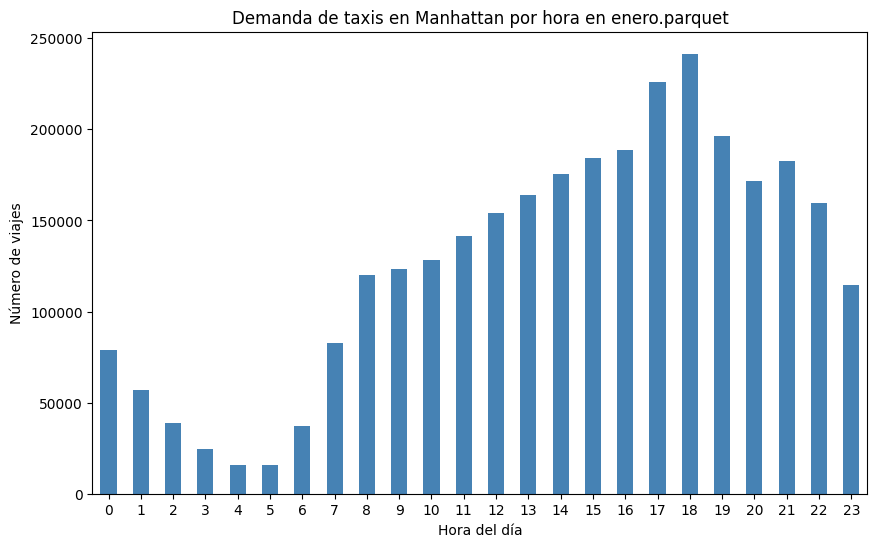

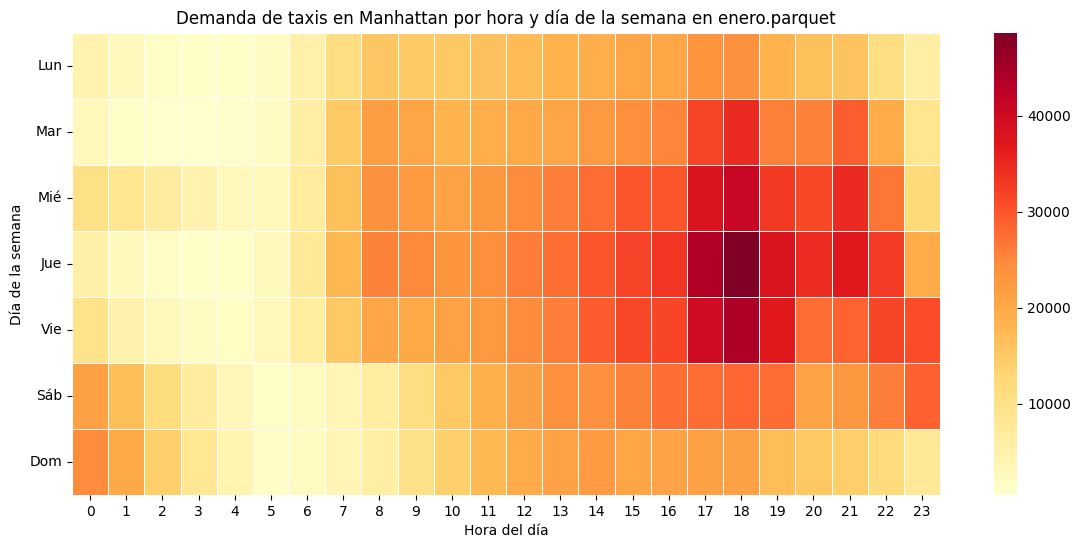

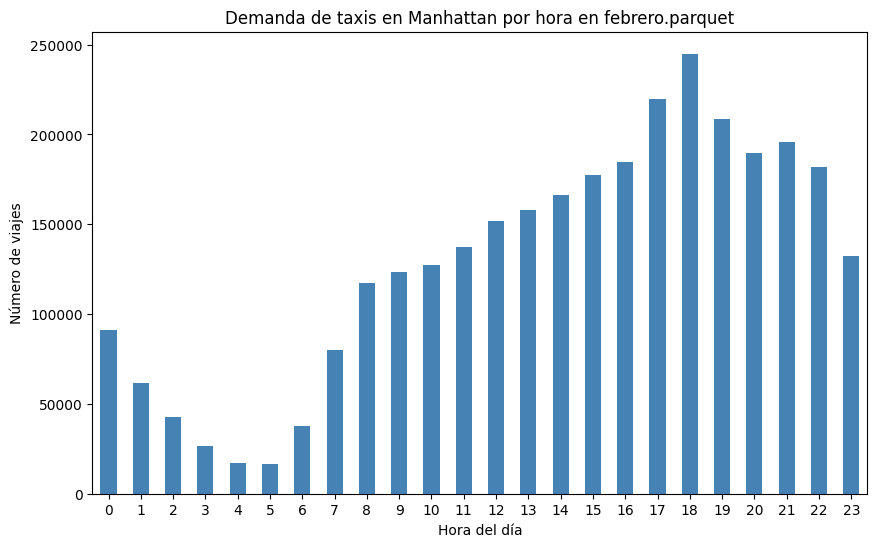

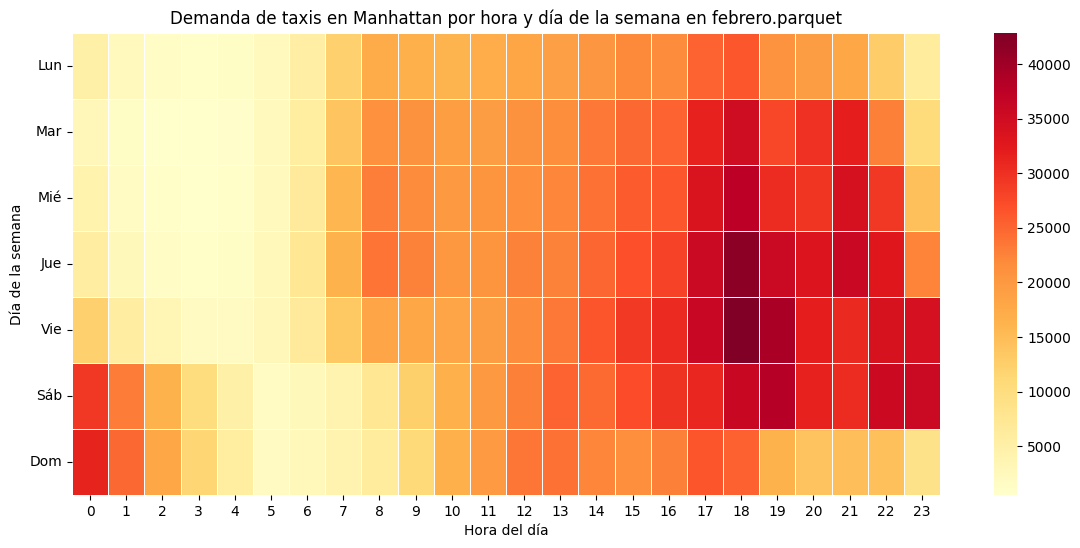

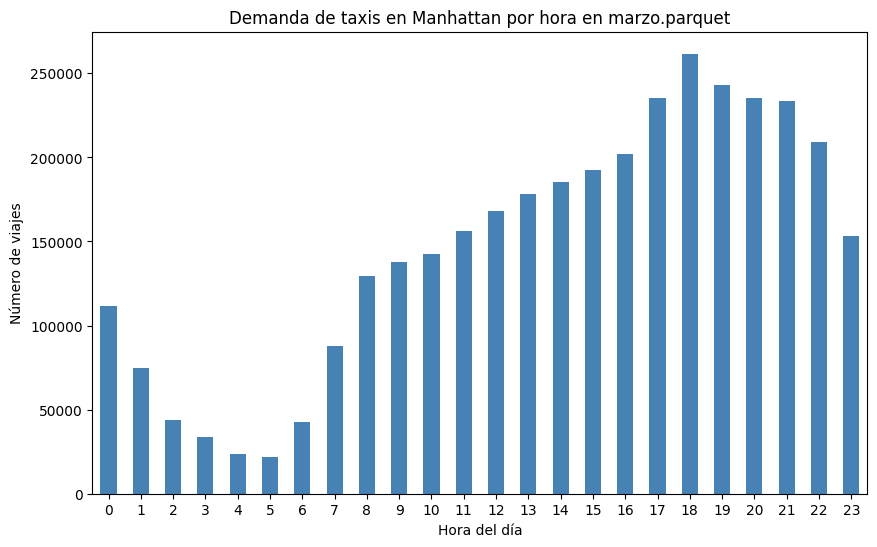

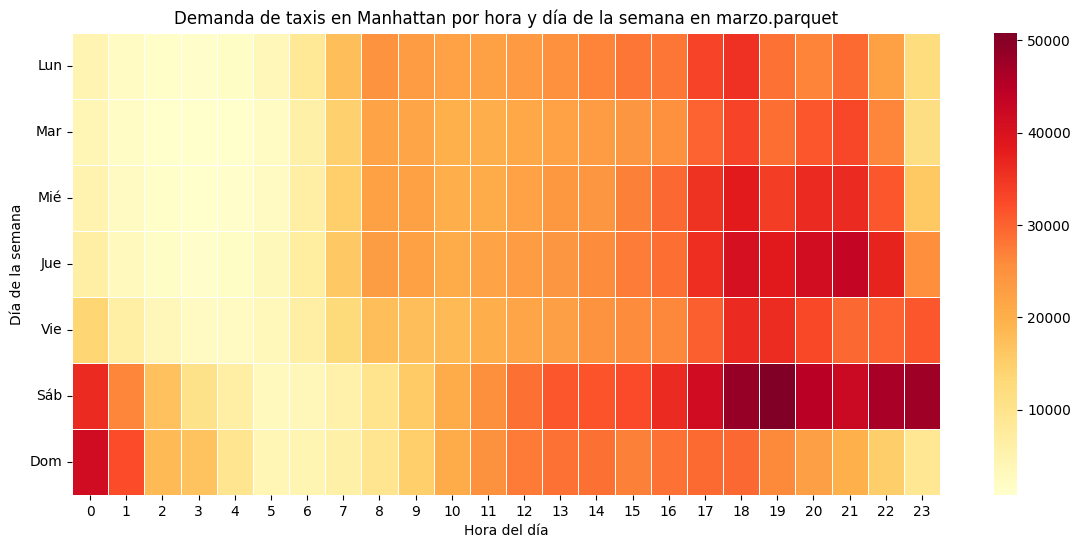

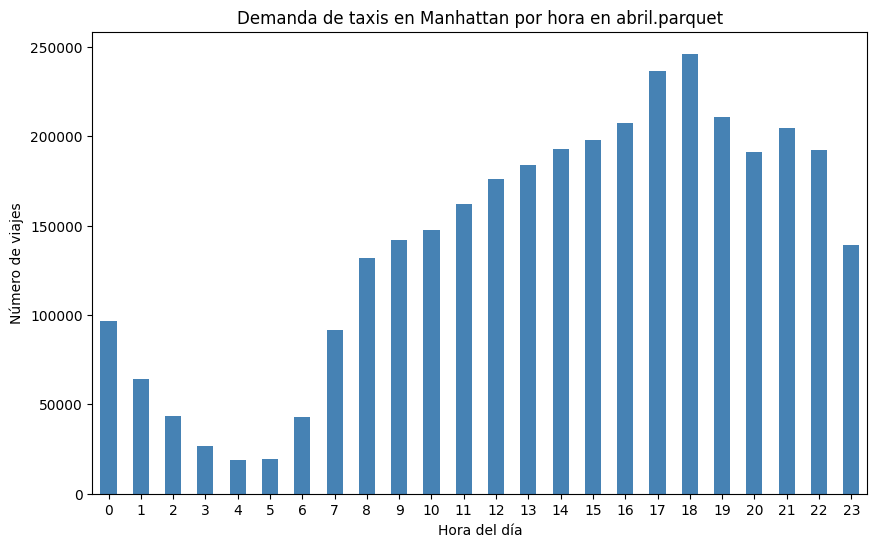

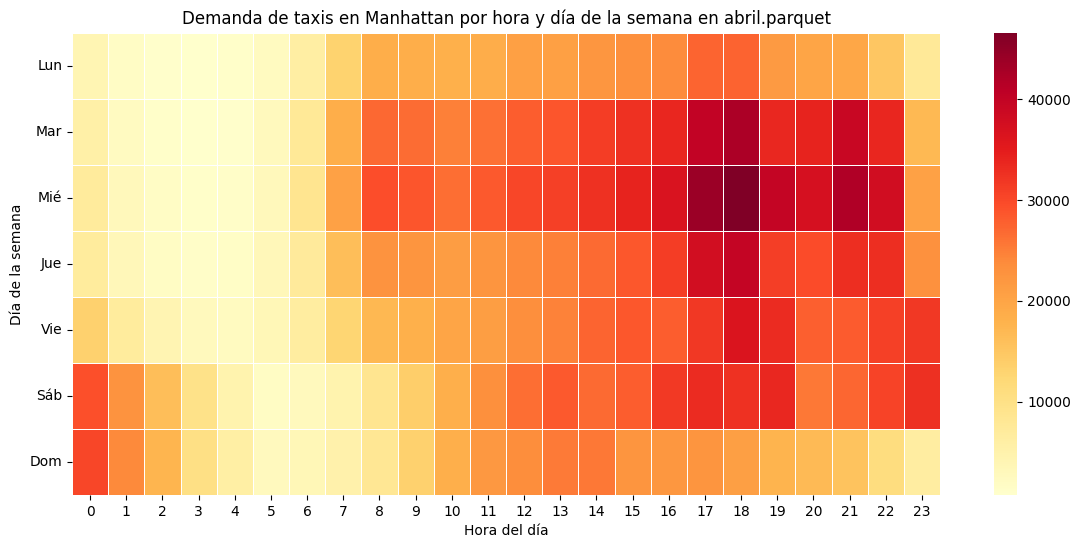

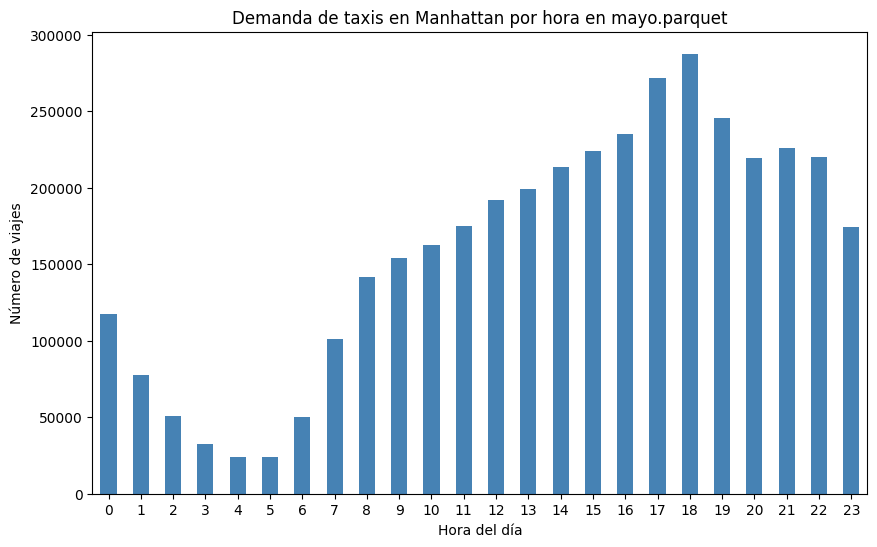

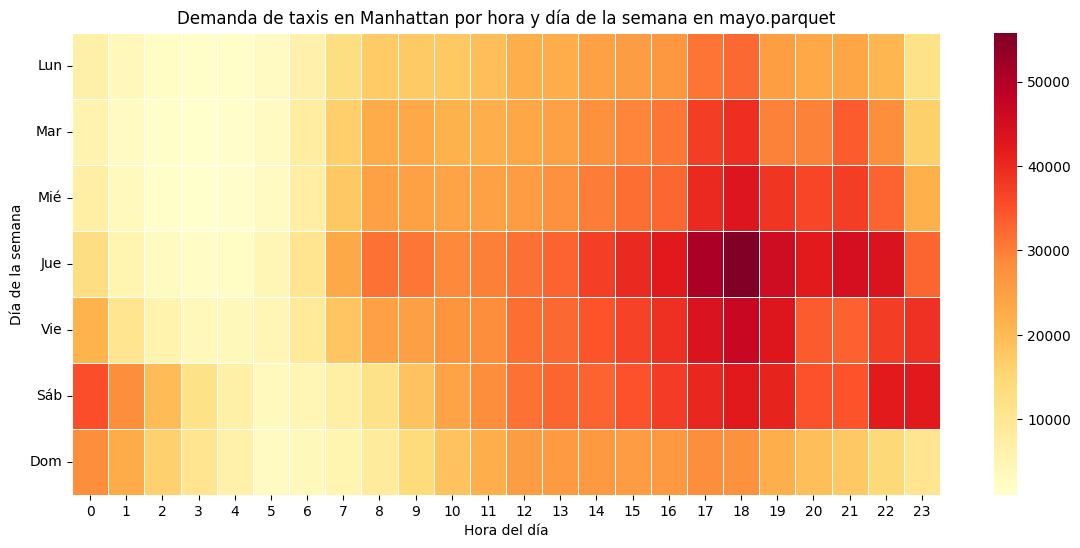

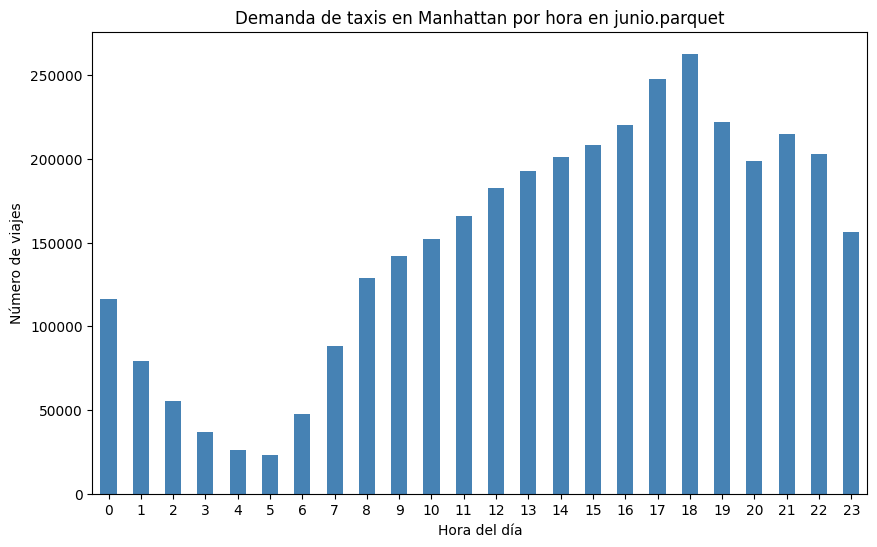

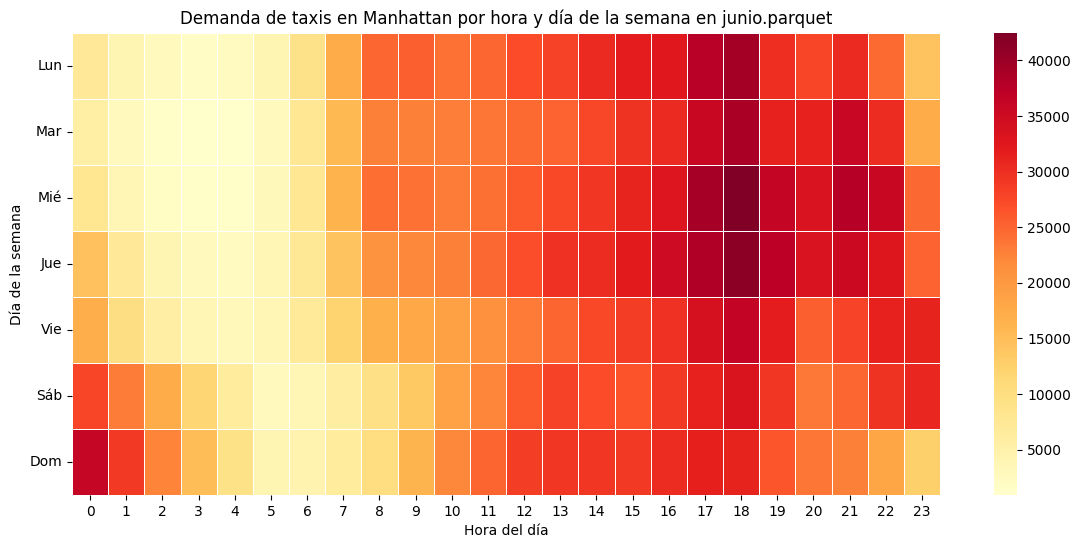

In [ ]:
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio"]
for mes in meses:
    archivo = f"data/{mes}.parquet"
    df = pd.read_parquet(archivo)
    df_manhattan = df[df["PULocationID"].isin(manhattan_ids)].copy()

    df_manhattan["tpep_pickup_datetime"] = pd.to_datetime(df_manhattan["tpep_pickup_datetime"])
    df_manhattan["hora"] = df_manhattan["tpep_pickup_datetime"].dt.hour
    demanda_horaria = df_manhattan.groupby("hora").size()

    #plot 
    plt.figure(figsize=(10,6))
    demanda_horaria.plot(kind="bar", color="steelblue")
    plt.title(f"Demanda de taxis en Manhattan por hora en {archivo}")
    plt.xlabel("Hora del día")
    plt.ylabel("Número de viajes")
    plt.xticks(rotation=0)
    #plt.show()
    plt.savefig(f"graficos/demanda_manhattan_por_hora_{archivo}.jpg", dpi=300, bbox_inches="tight")

    #heatmap

    # Convertir a datetime
    df_manhattan["tpep_pickup_datetime"] = pd.to_datetime(df_manhattan["tpep_pickup_datetime"])

    # Extraer hora y día de la semana
    df_manhattan["hora"] = df_manhattan["tpep_pickup_datetime"].dt.hour
    df_manhattan["dia_semana"] = df_manhattan["tpep_pickup_datetime"].dt.dayofweek
    # 0 = Lunes, 6 = Domingo

    # Crear tabla de conteo (día x hora)
    heatmap_data = df_manhattan.groupby(["dia_semana","hora"]).size().unstack(fill_value=0)

    # Reordenar días para que empiece en lunes
    dias = ["Lun","Mar","Mié","Jue","Vie","Sáb","Dom"]

    plt.figure(figsize=(14,6))
    sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, annot=False)

    plt.title(f"Demanda de taxis en Manhattan por hora y día de la semana en {archivo}")
    plt.xlabel("Hora del día")
    plt.ylabel("Día de la semana")
    plt.yticks(ticks=[i+0.5 for i in range(7)], labels=dias, rotation=0)
    plt.savefig(f"graficos/heatmap_{archivo}.jpg", dpi=300, bbox_inches="tight")
    #plt.show()